# Linear Least Squares Regression

Here we look at the most basic linear least squares regression. The main purpose is to provide an example of the basic commands. It is assumed that you know how to enter data or read data files which is covered in the first chapter, and it is assumed that you are familiar with the different data types.

We will examine the interest rate for four year car loans, and the data that we use comes from the U.S. Federal Reserve’s mean rates . We are looking at and plotting means. This, of course, is a very bad thing because it removes a lot of the variance and is misleading. The only reason that we are working with the data in this way is to provide an example of linear regression that does not use too many data points. Do not try this without a professional near you, and if a professional is not near you do not tell anybody you did this. They will laugh at you. People are mean, especially professionals.

The first thing to do is to specify the data. Here there are only five pairs of numbers so we can enter them in manually. Each of the five pairs consists of a year and the mean interest rate:

In [1]:
year <- c(2000 ,   2001  ,  2002  ,  2003 ,   2004)
rate <- c(9.34 ,   8.50  ,  7.62  ,  6.93  ,  6.60)

The next thing we do is take a look at the data. We first plot the data using a scatter plot and notice that it looks linear. To confirm our suspicions we then find the correlation between the year and the mean interest rates:

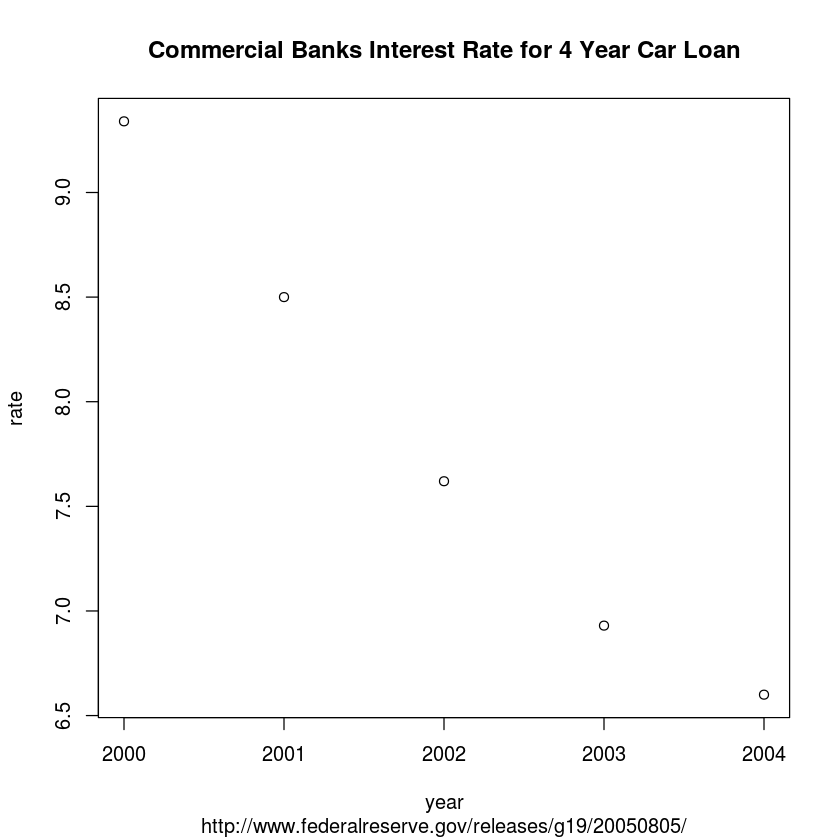

In [2]:
plot(year,rate,
     main="Commercial Banks Interest Rate for 4 Year Car Loan",
     sub="http://www.federalreserve.gov/releases/g19/20050805/")

In [3]:
cor(year,rate)

[1] -0.9880813

At this point we should be excited because associations that strong never happen in the real world unless you cook the books or work with averaged data. The next question is what straight line comes “closest” to the data? In this case we will use least squares regression as one way to determine the line.

Before we can find the least square regression line we have to make some decisions. First we have to decide which is the explanatory and which is the response variable. Here, we arbitrarily pick the explanatory variable to be the year, and the response variable is the interest rate. This was chosen because it seems like the interest rate might change in time rather than time changing as the interest rate changes. (We could be wrong, finance is very confusing.)

The command to perform the least square regression is the lm command. The command has many options, but we will keep it simple and not explore them here. If you are interested use the help(lm) command to learn more. Instead the only option we examine is the one necessary argument which specifies the relationship.

Since we specified that the interest rate is the response variable and the year is the explanatory variable this means that the regression line can be written in slope-intercept form:

    rate=(slope)year+(intercept)

The way that this relationship is defined in the lm command is that you write the vector containing the response variable, a tilde (“~”), and a vector containing the explanatory variable:

In [4]:
fit <- lm(rate ~ year)
fit


Call:
lm(formula = rate ~ year)

Coefficients:
(Intercept)         year  
   1419.208       -0.705  


When you make the call to lm it returns a variable with a lot of information in it. If you are just learning about least squares regression you are probably only interested in two things at this point, the slope and the y-intercept. If you just type the name of the variable returned by lm it will print out this minimal information to the screen. (See above.)

If you would like to know what else is stored in the variable you can use the attributes command:

In [5]:
attributes(fit)

$names
 [1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"        

$class
[1] "lm"

One of the things you should notice is the coefficients variable within fit. You can print out the y-intercept and slope by accessing this part of the variable:

In [6]:
fit$coefficients[1]

(Intercept) 
   1419.208

In [7]:
fit$coefficients[[1]]

[1] 1419.208

In [8]:
fit$coefficients[2]

year 
-0.705

In [9]:
fit$coefficients[[2]]

[1] -0.705

Note that if you just want to get the number you should use two square braces. So if you want to get an estimate of the interest rate in the year 2015 you can use the formula for a line:

In [10]:
fit$coefficients[[2]]*2015+fit$coefficients[[1]]

[1] -1.367

So if you just wait long enough, the banks will pay you to take a car!

A better use for this formula would be to calculate the residuals and plot them:

[1]  0.132 -0.003 -0.178 -0.163  0.212

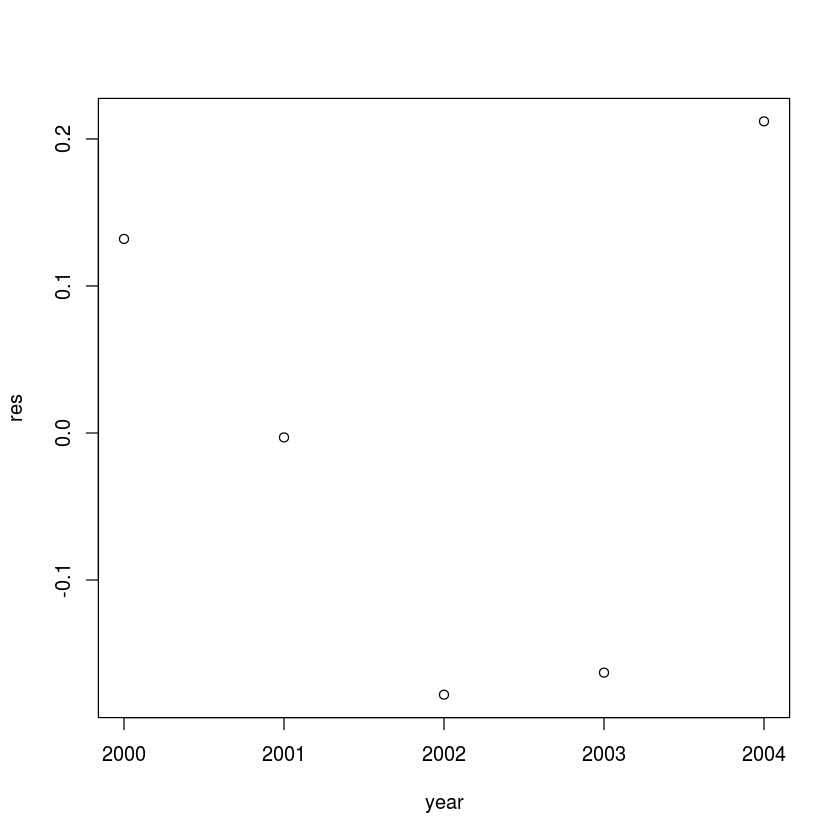

In [11]:
res <- rate - (fit$coefficients[[2]]*year+fit$coefficients[[1]])
res
plot(year,res)


That is a bit messy, but fortunately there are easier ways to get the residuals. Two other ways are shown below:

In [12]:
residuals(fit)

1      2      3      4      5 
 0.132 -0.003 -0.178 -0.163  0.212

In [13]:
fit$residuals

1      2      3      4      5 
 0.132 -0.003 -0.178 -0.163  0.212

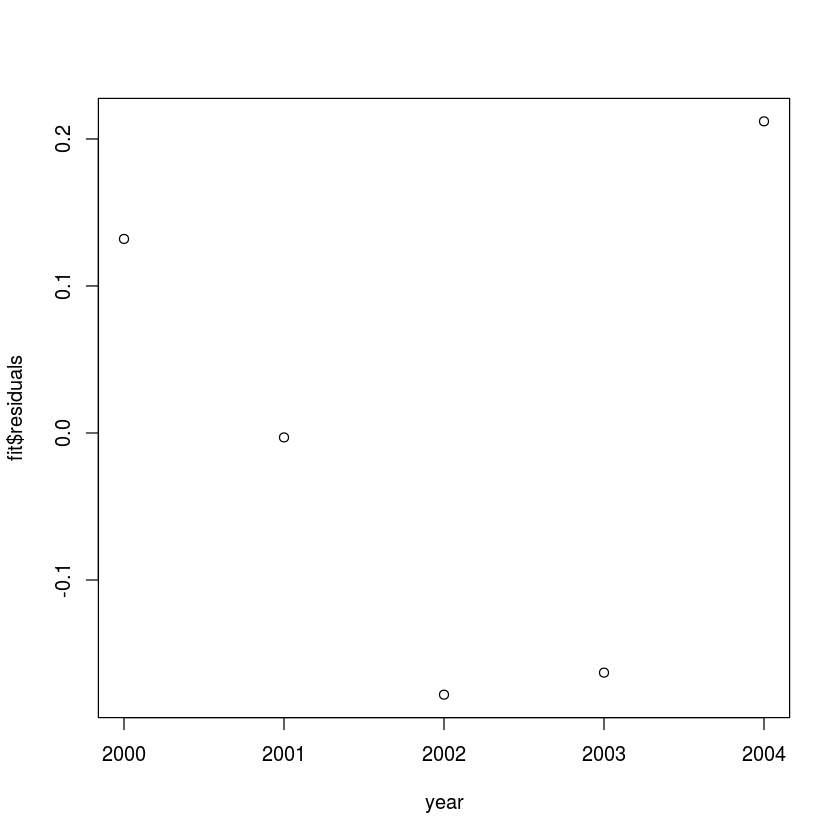

In [14]:
plot(year,fit$residuals)

If you want to plot the regression line on the same plot as your scatter plot you can use the abline function along with your variable fit:

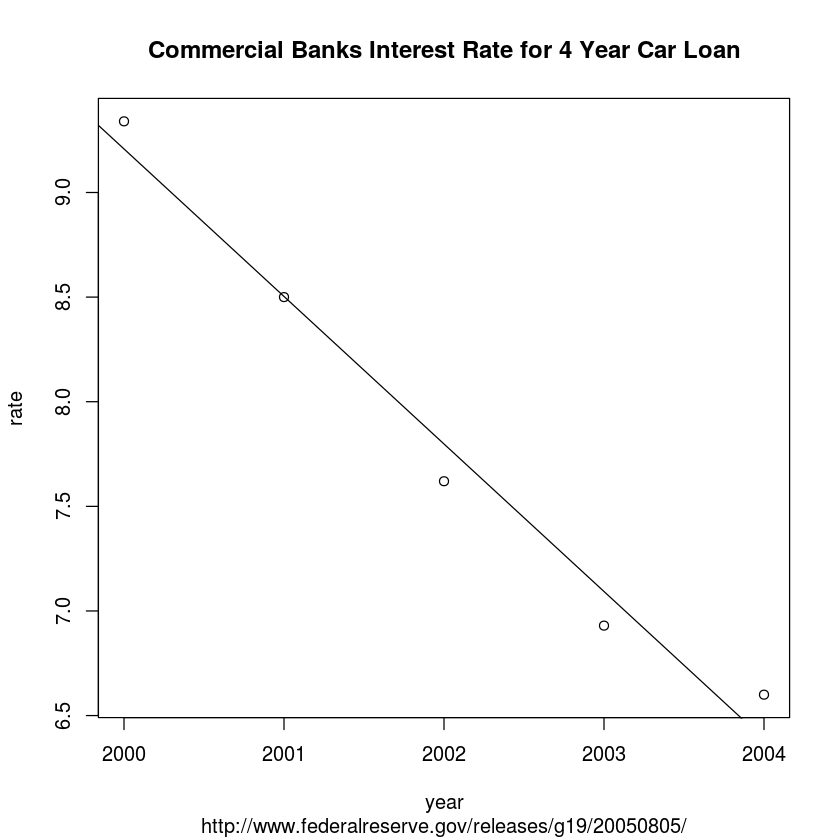

In [15]:
plot(year,rate,
     main="Commercial Banks Interest Rate for 4 Year Car Loan",
     sub="http://www.federalreserve.gov/releases/g19/20050805/")
abline(fit)

Finally, as a teaser for the kinds of analyses you might see later, you can get the results of an F-test by asking R for a summary of the fit variable:

In [16]:
summary(fit)


Call:
lm(formula = rate ~ year)

Residuals:
     1      2      3      4      5 
 0.132 -0.003 -0.178 -0.163  0.212 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 1419.20800  126.94957   11.18  0.00153 **
year          -0.70500    0.06341  -11.12  0.00156 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2005 on 3 degrees of freedom
Multiple R-squared:  0.9763,	Adjusted R-squared:  0.9684 
F-statistic: 123.6 on 1 and 3 DF,  p-value: 0.001559
